In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from data import *

In [2]:
y = labeledY()
x = completeX()
biny = binaryY()
df = completeDS()
x_scaled = standardX()
biny = biny.astype(np.int8)

In [3]:
df.where(df.outcome=='N').shape[0]

198

In [4]:
df.where(df.outcome=='R').shape[0]

198

In [5]:
df.outcome.unique()

array(['N', 'R'], dtype=object)

In [6]:
df[df['outcome']=='N'].shape[0]

151

In [7]:
df[df['outcome']=='R'].shape[1]

45

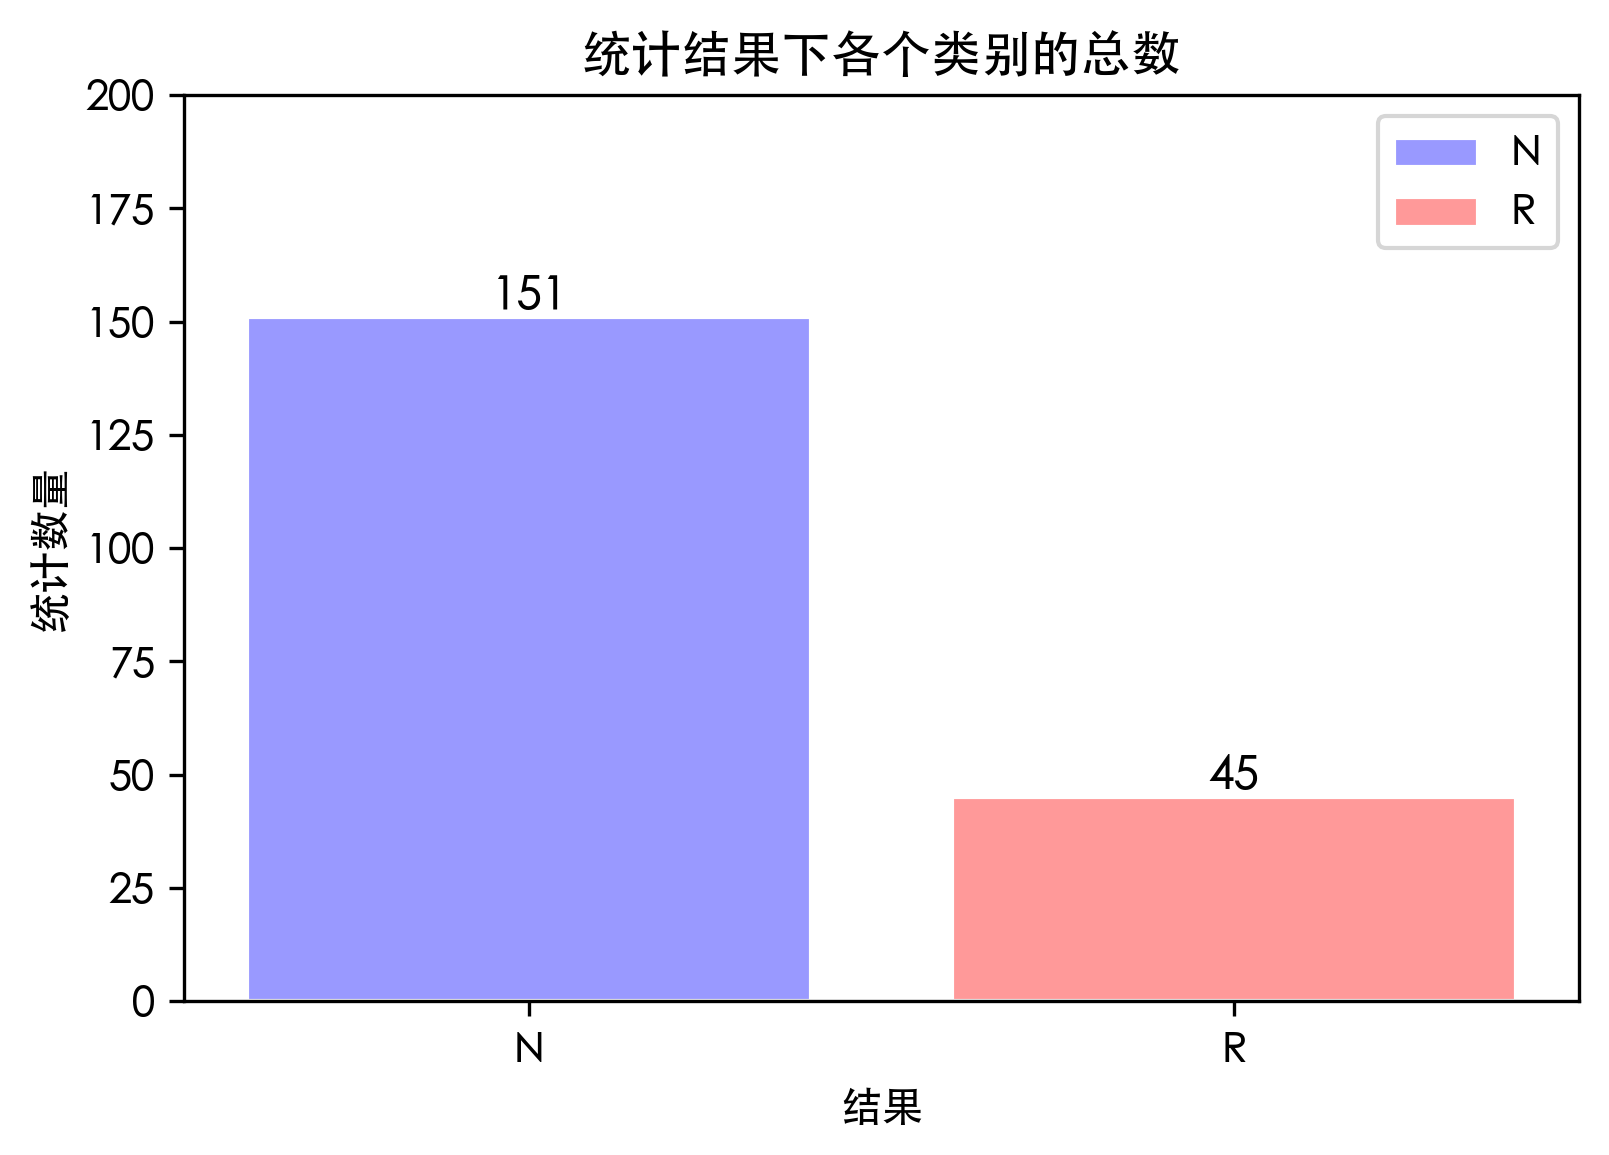

In [8]:
plt.rcParams['font.sans-serif'] = ['Heiti TC'] 
plt.rcParams['savefig.dpi'] = 300  
plt.rcParams['figure.dpi'] = 300  

count = [151, 45]
outcome = df.outcome.unique()
facecolor = ['#9999ff', '#ff9999']
labels = ['N', 'R']
for x,y,z,u in zip(outcome, count, facecolor, labels):
    plt.bar([x], [y], color=z, edgecolor='white', label=u)
for x, y in zip(outcome, count):
    plt.text(x, y+0.05, str(y), ha='center', va= 'bottom',fontsize=11)

plt.ylim(0, 200)
plt.xlabel('结果')
plt.ylabel('统计数量')
plt.title('统计结果下各个类别的总数')
plt.legend()
plt.savefig('CategoryCount.png')
plt.show()

In [9]:
df.columns

Index(['id', 'outcome', 'recur_time', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'tumor_size', 'lymph_node_status', 'radius_distance',
       'texture_distance', 'perimeter_distance', 'area_distance',
       'smoothness_distance', 'compactness_distance', 'concavity_distance',
       'concave points_distance', 'symmetry_distance',
       'fractal_dimension_distance'],
      dtype='object')

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
cols = ['recur_time',  'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'tumor_size', 'lymph_node_status', 'radius_distance',
       'texture_distance',  'smoothness_distance',
       'compactness_distance', 'concavity_distance',
       'concave points_distance', 'symmetry_distance',
       'fractal_dimension_distance']
exp = lambda x: 0 if x=='N' else 1
table= df[cols]
table['outcome'] = biny

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [11]:
table

,recur_time,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,tumor_size,lymph_node_status,radius_distance,texture_distance,smoothness_distance,compactness_distance,concavity_distance,concave points_distance,symmetry_distance,fractal_dimension_distance,outcome
0,31.0,0.6249,1.8900,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,5.0,5.00000,3.609999,9.480001,0.02461,0.08900,0.20540,0.04645,0.0812,0.01780,0
1,61.0,1.0950,0.9053,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,3.0,2.00000,7.389999,6.950000,0.04380,0.38800,0.41180,0.11830,0.2182,0.04019,0
2,116.0,0.5854,0.6105,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,2.5,0.00000,3.529999,3.539999,0.03044,0.22600,0.21590,0.12140,0.2001,0.03057,0
3,123.0,0.4956,1.1560,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,2.0,0.00000,3.490000,6.120001,0.06730,0.58240,0.44550,0.15230,0.4041,0.07556,0
4,27.0,0.7572,0.7813,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,3.5,0.00000,2.250000,2.330000,0.03710,0.07220,0.20200,0.05820,0.0555,0.01795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,10.0,1.3740,2.3120,0.004422,0.02679,0.02433,0.020360,0.02486,0.003922,6.0,2.00000,2.150000,2.889999,0.00599,0.04028,0.03698,0.03011,0.0333,0.00526,0
194,8.0,0.3235,1.8390,0.006178,0.02088,0.02834,0.010790,0.02122,0.003168,1.5,0.00000,1.900001,10.299999,0.03321,0.13000,0.16000,0.06360,0.1179,0.01919,0
195,12.0,0.6101,1.4250,0.006890,0.01556,0.03155,0.009714,0.02734,0.001377,3.7,0.00000,3.590000,7.469999,0.03658,0.09065,0.14827,0.04452,0.1569,0.00641,0
196,3.0,1.0850,0.8469,0.006831,0.03541,0.04948,0.017700,0.01481,0.003979,3.0,3.21134,6.920000,5.139999,0.04280,0.24400,0.30310,0.08970,0.0948,0.02509,1


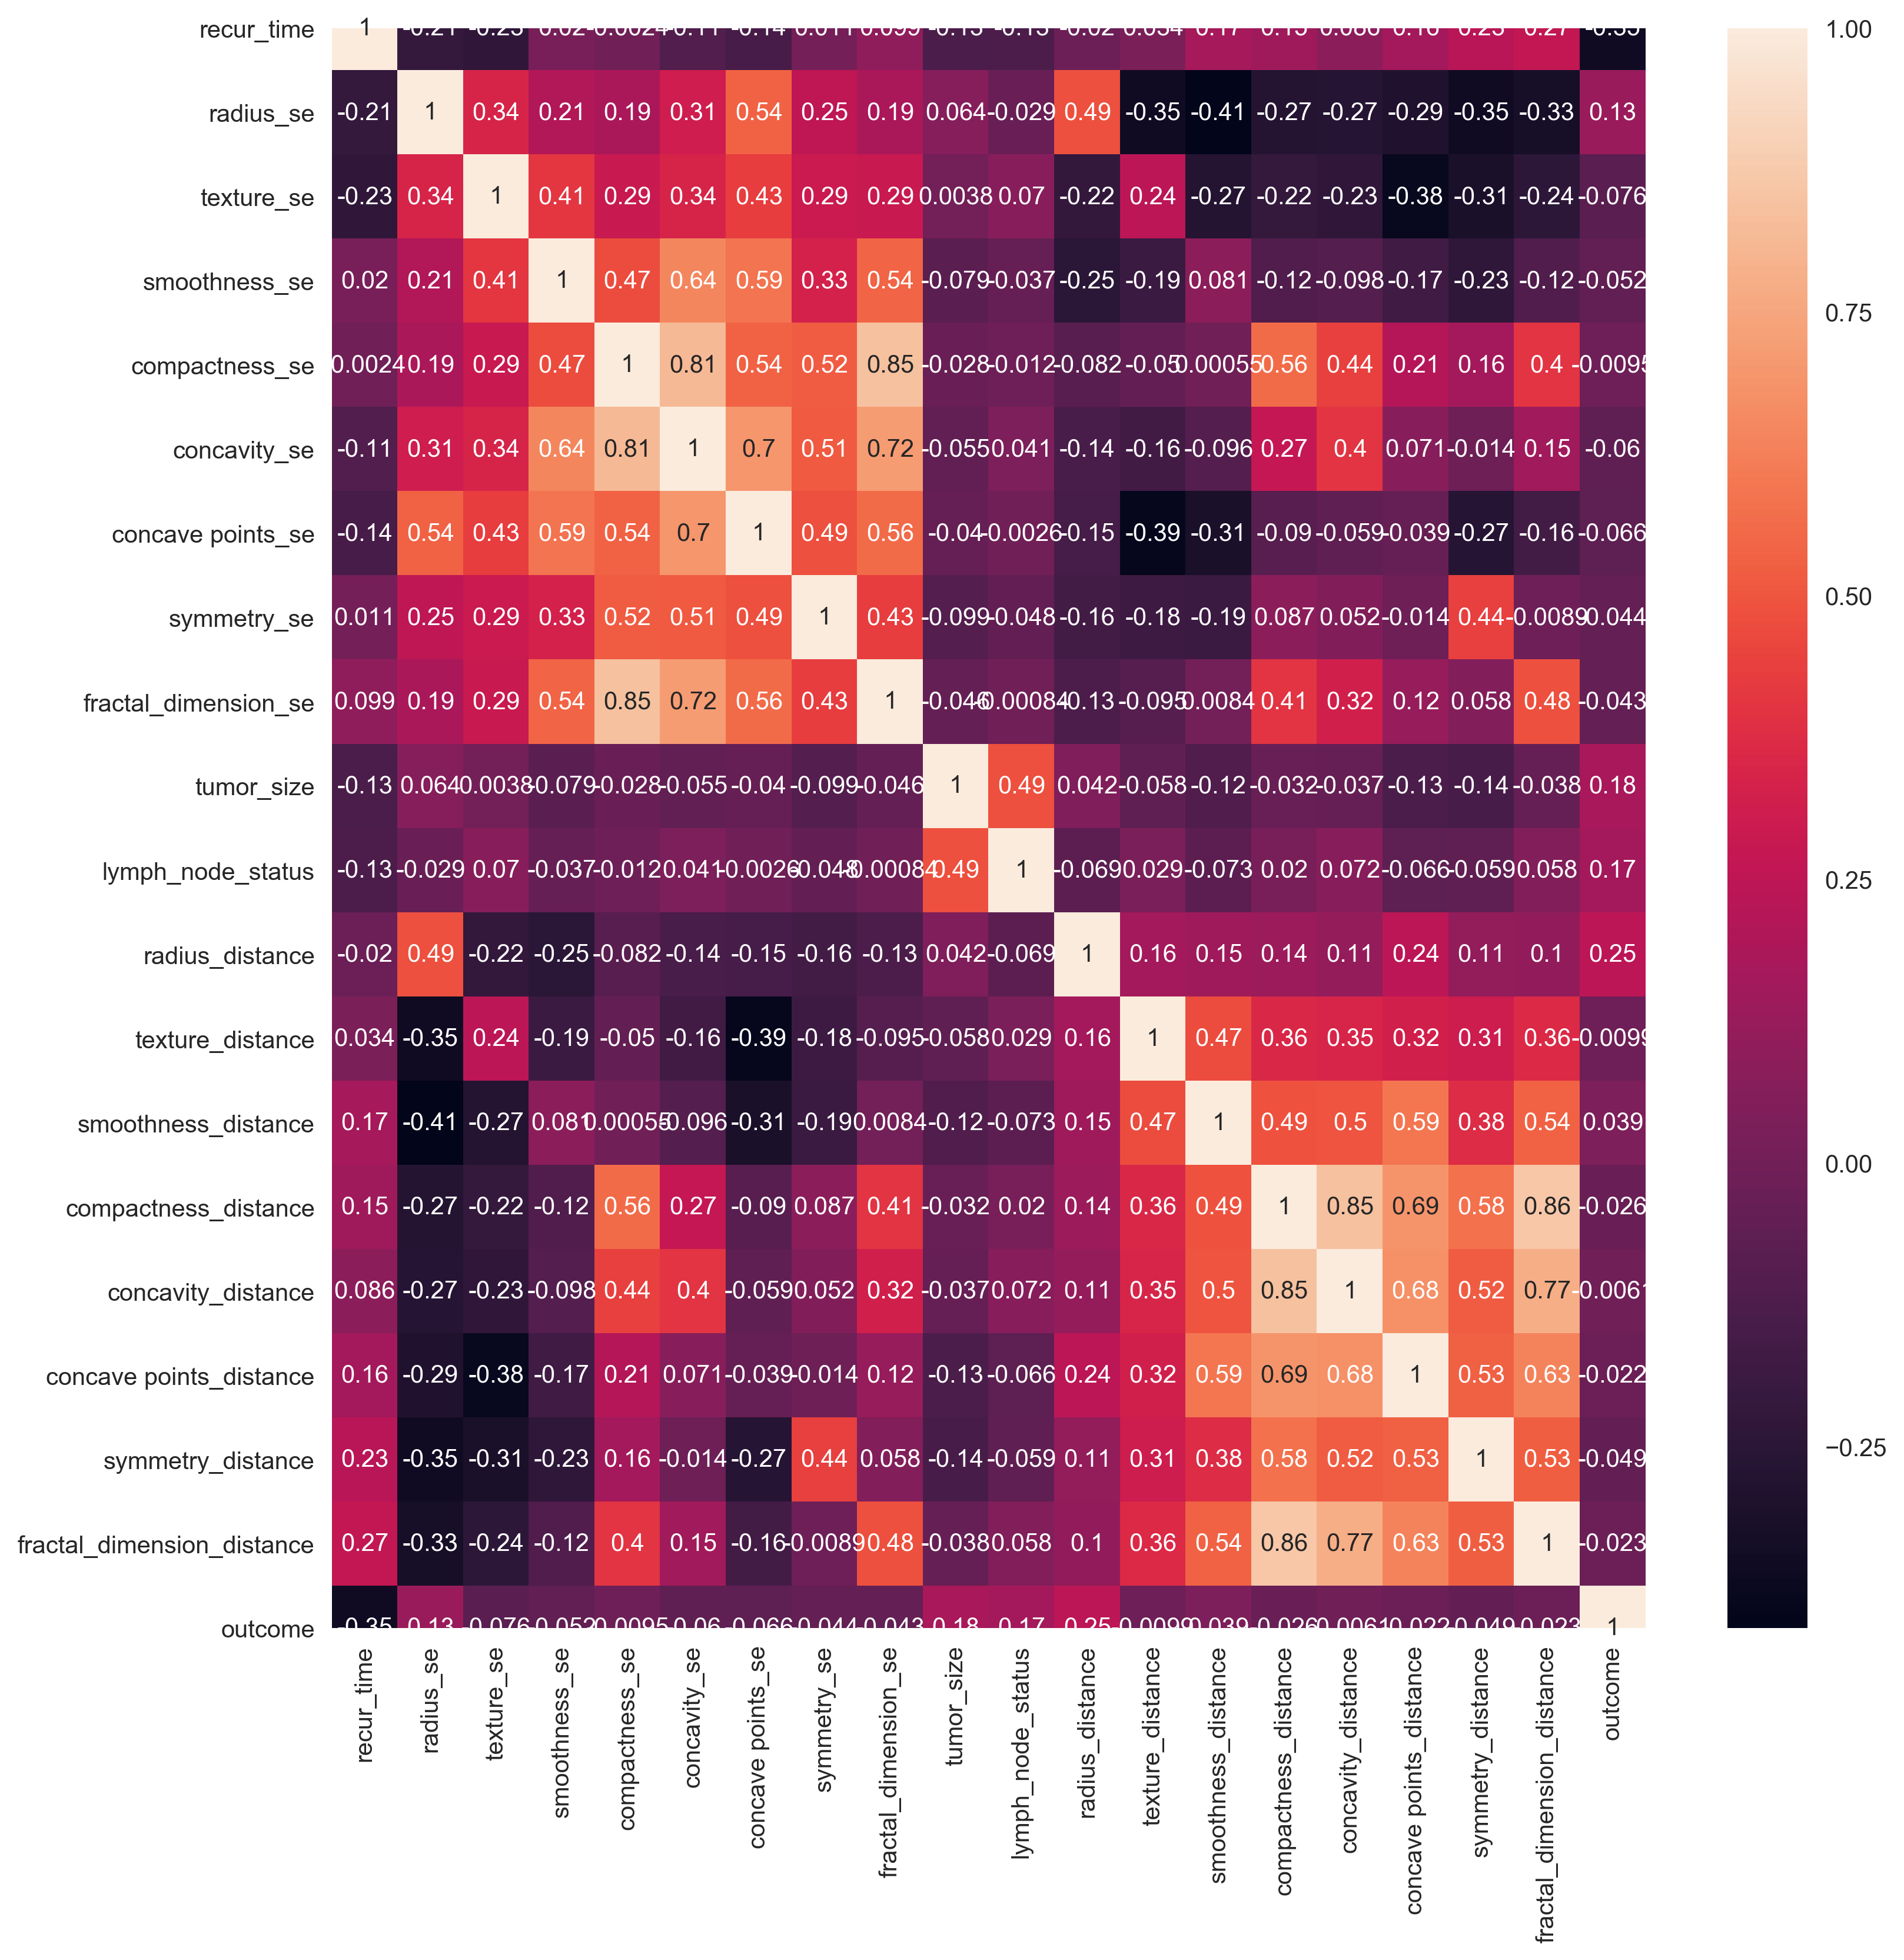

In [23]:
plt.rcParams['savefig.dpi'] = 300  
plt.rcParams['figure.dpi'] = 300  
corr = table.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)
plt.savefig('corr_matrix.png')
plt.show()

In [13]:
corr_outcome = corr.sort_values(by=['outcome'])


In [14]:
lst = ['recur_time', 'radius_mean', 'texture_mean',
       'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'tumor_size', 'lymph_node_status', 'radius_distance',
       'texture_distance', 'perimeter_distance',
       'area_distance', 'smoothness_distance',
       'compactness_distance', 'concavity_distance',
       'concave points_distance', 'symmetry_distance',
       'fractal_dimension_distance']
len(lst)

25

In [15]:
table.columns

Index(['recur_time', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'tumor_size', 'lymph_node_status',
       'radius_distance', 'texture_distance', 'smoothness_distance',
       'compactness_distance', 'concavity_distance', 'concave points_distance',
       'symmetry_distance', 'fractal_dimension_distance', 'outcome'],
      dtype='object')

In [16]:
corr_outcome.shape

(20, 20)

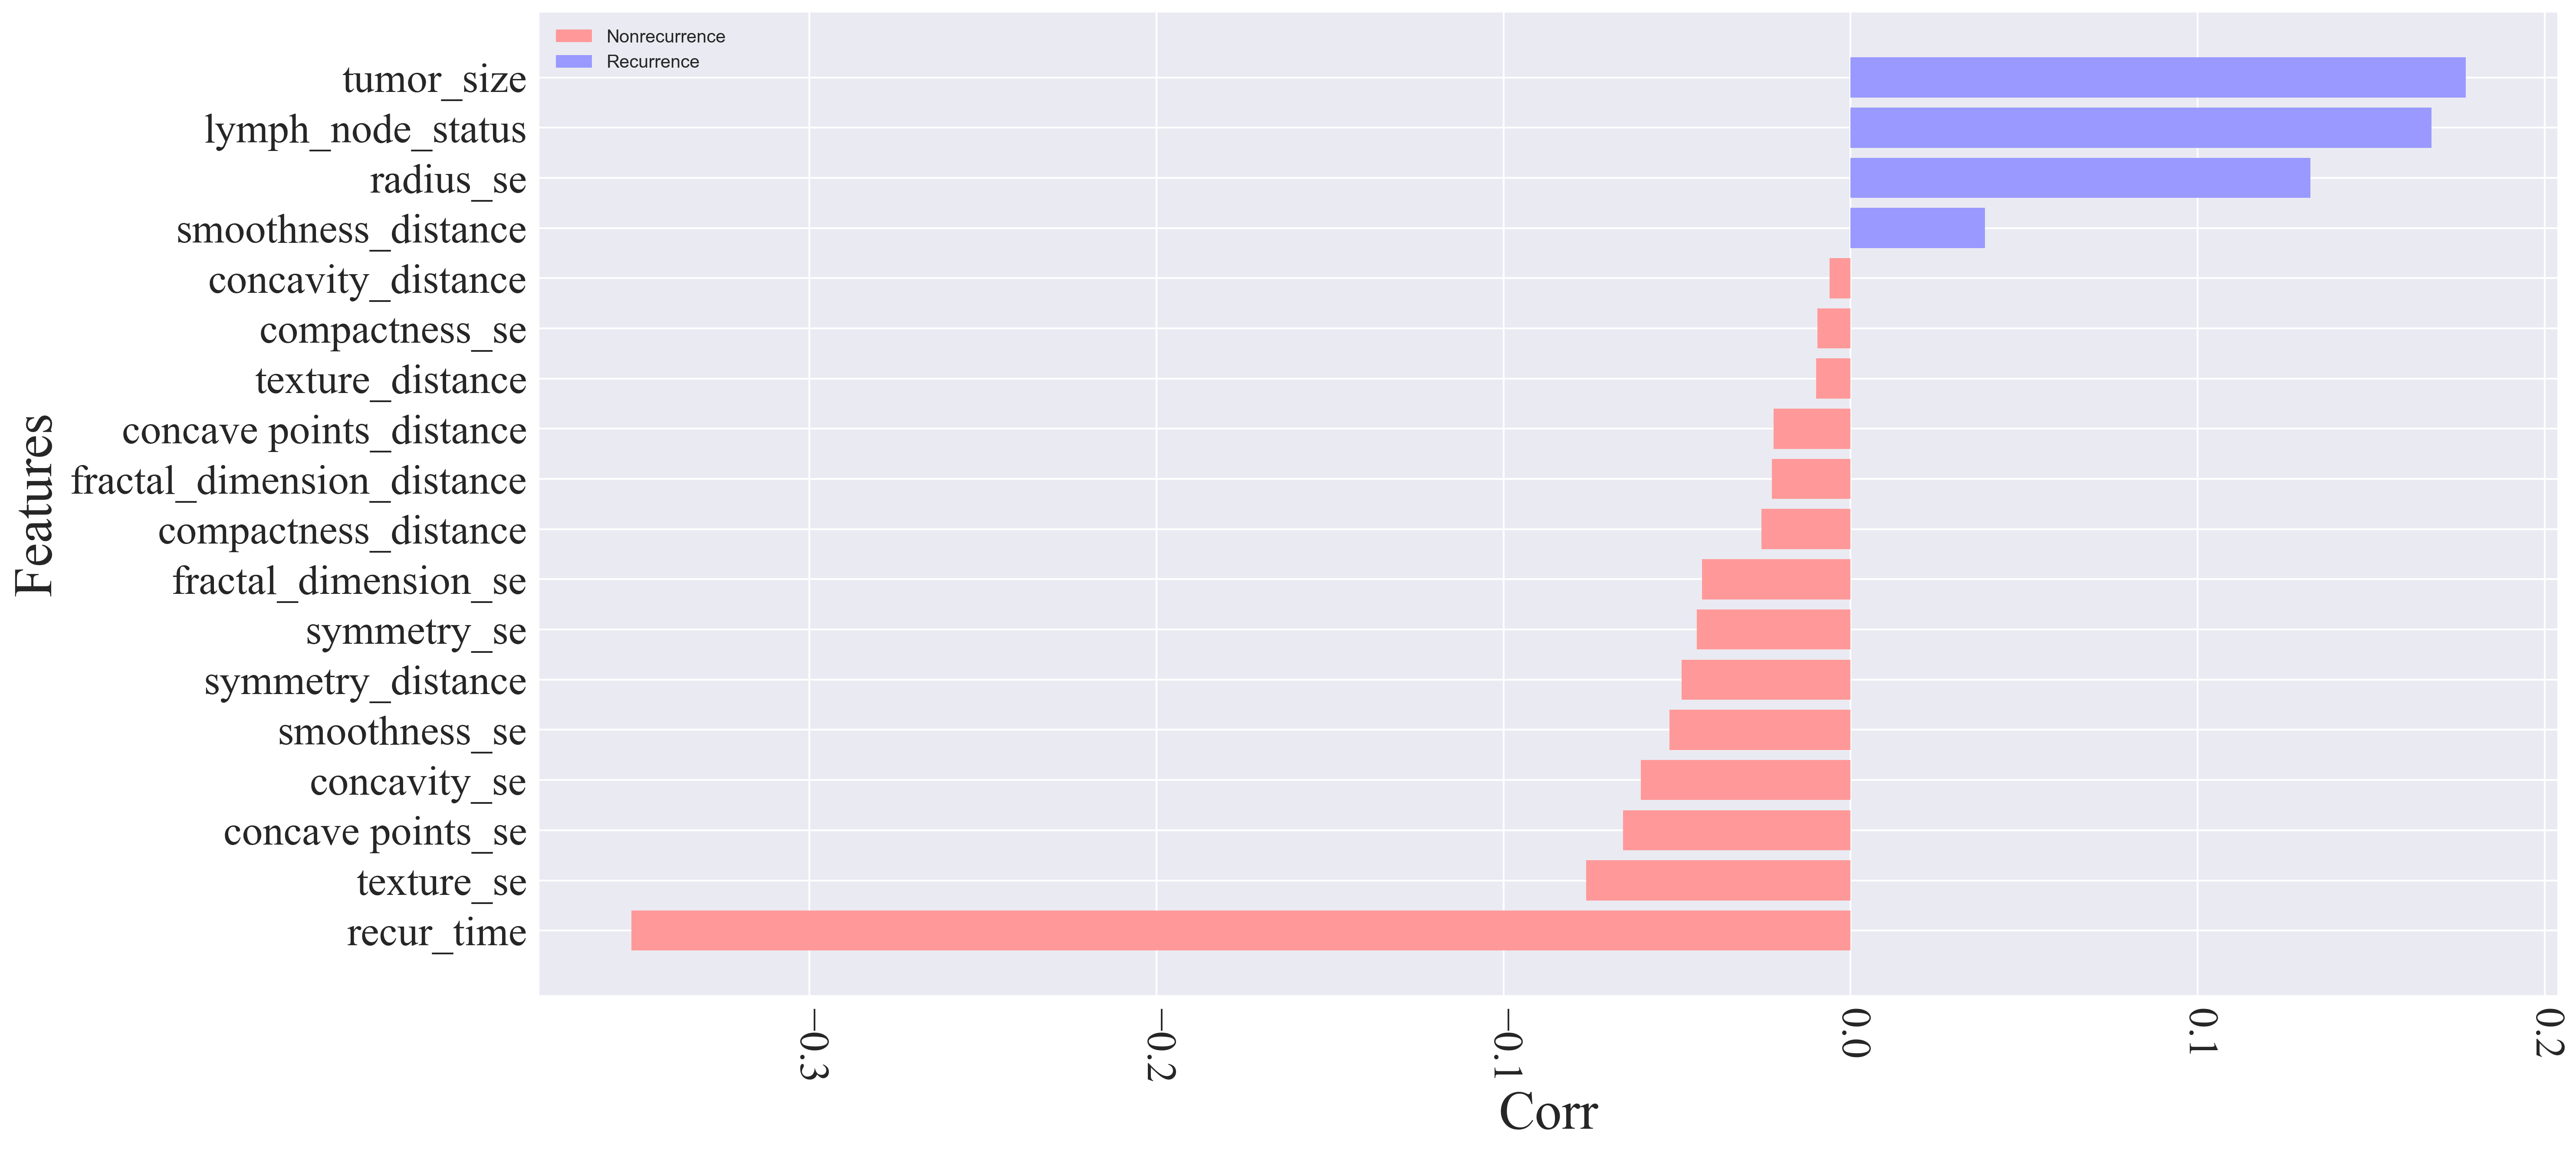

In [17]:
pos = corr_outcome[corr_outcome.outcome>=0]
neg = corr_outcome[corr_outcome.outcome<0]

fig = plt.figure(figsize=(20,10))

plt.style.use("seaborn")
ax = fig.add_subplot(1,1,1)

ax.barh(neg.index, neg.outcome, facecolor = '#ff9999', label='Nonrecurrence')
ax.barh(pos.index[:4], pos.outcome[:4], facecolor = '#9999ff', label='Recurrence')

plt.tick_params(labelsize=23)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 30,
}

plt.xlabel("Corr", font)
plt.ylabel("Features", font)
plt.xticks(rotation=-90)

plt.legend()

plt.savefig('Corr.png')

plt.show()

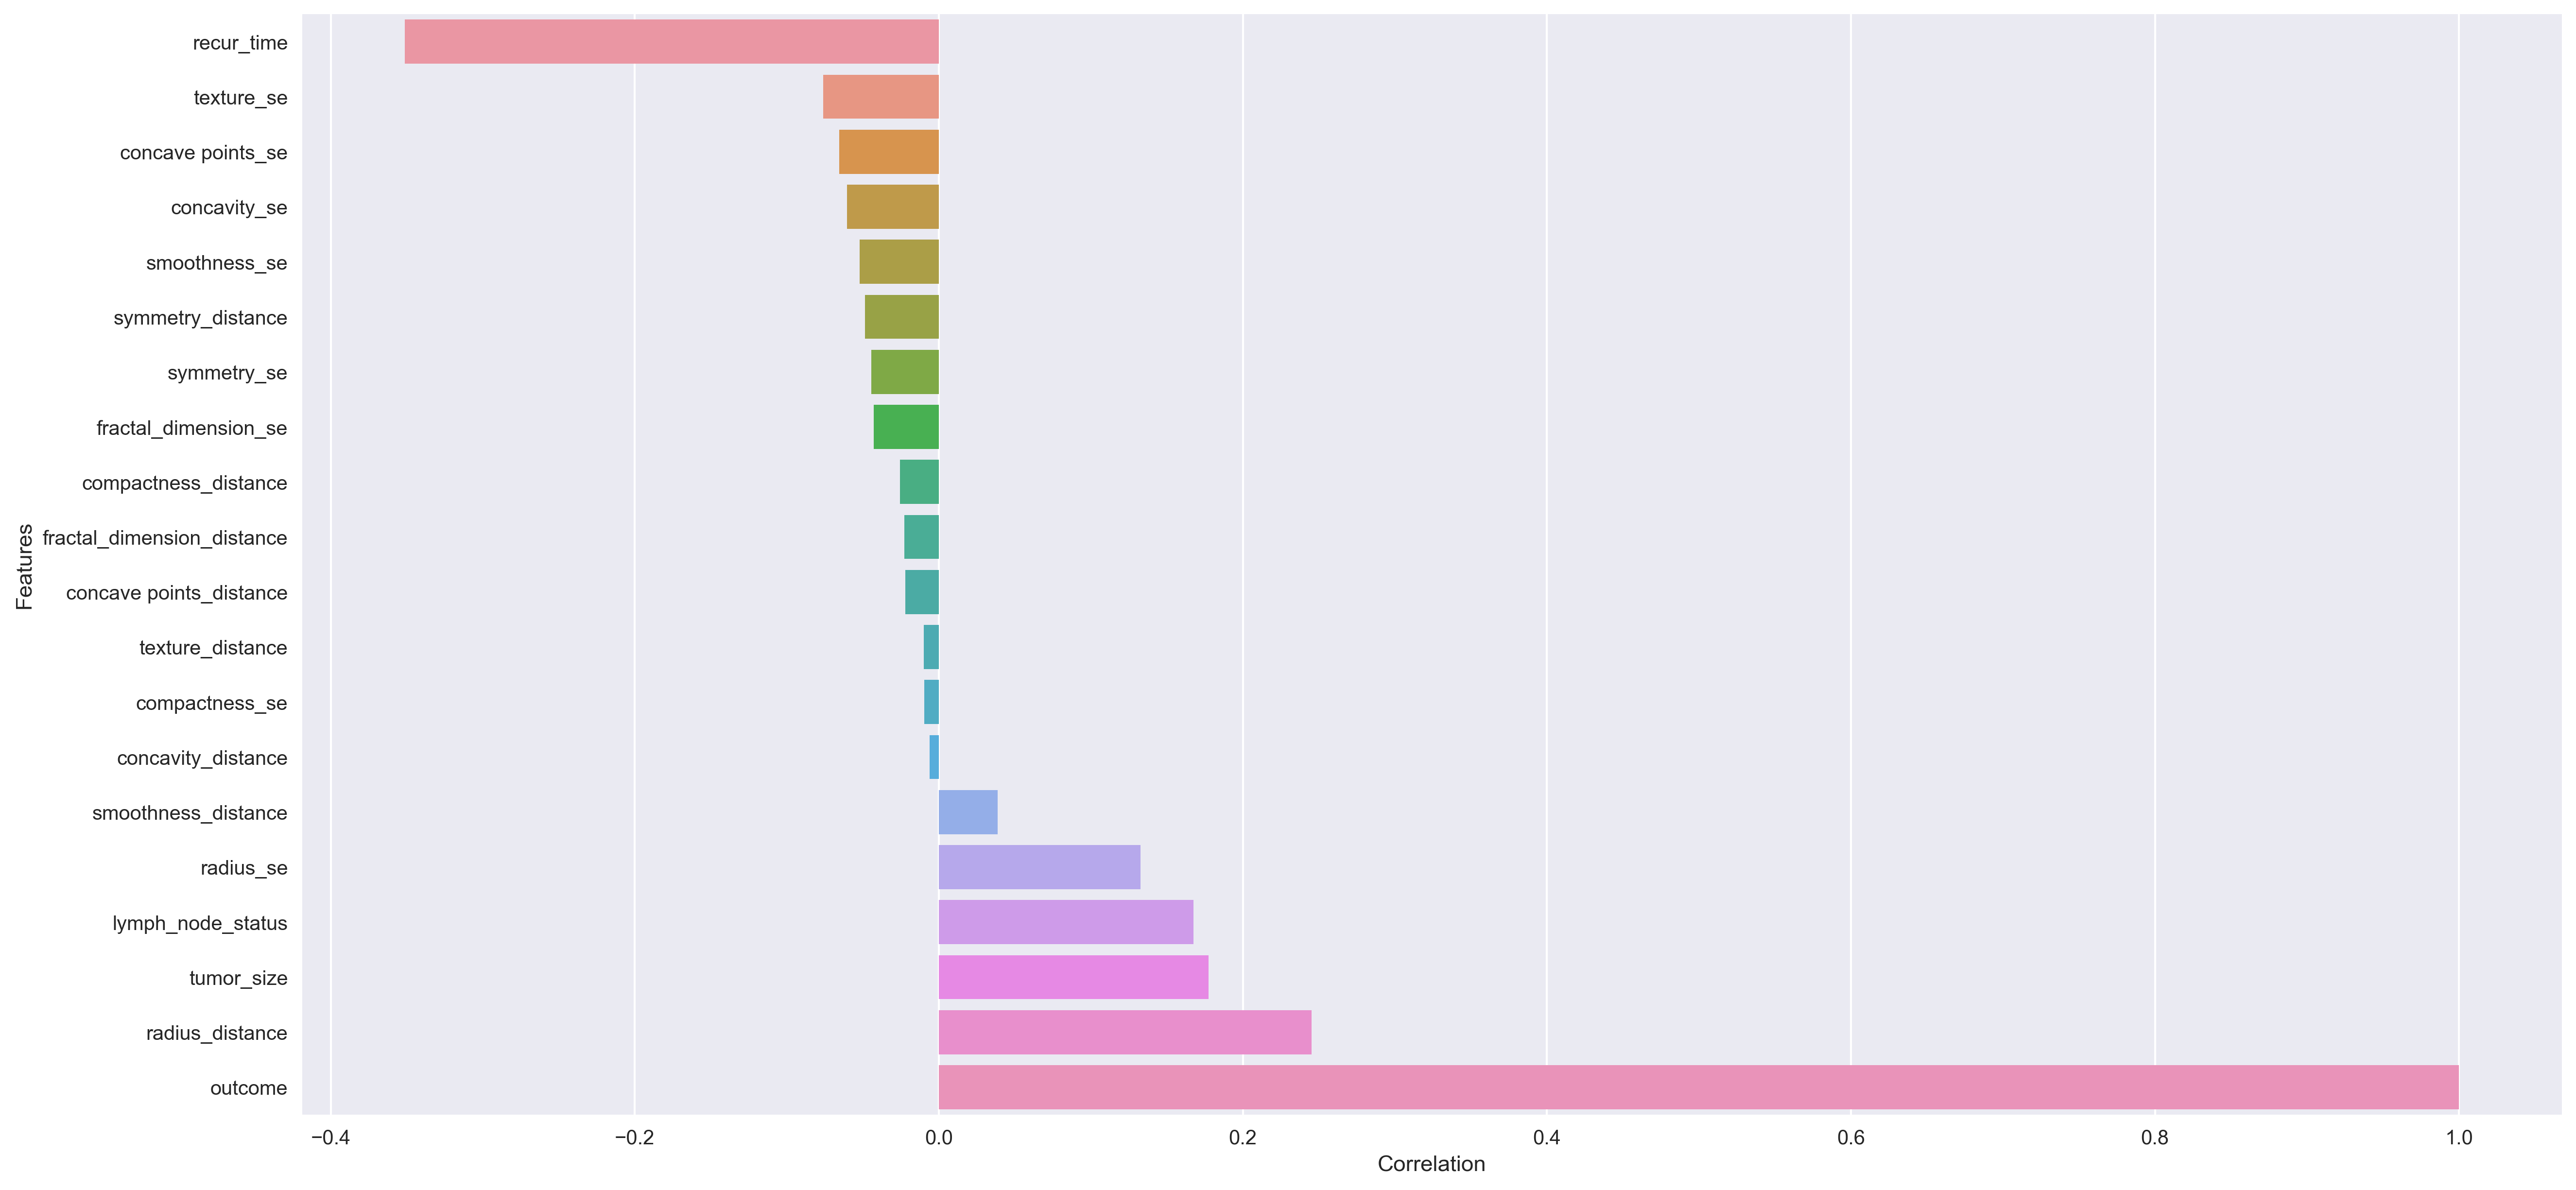

In [18]:
plt.rcParams['savefig.dpi'] = 300  
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(figsize=(20,10))
output_corr = pd.DataFrame({'Features':corr_outcome.index, 'Correlation':corr_outcome.outcome})
sns.barplot(x="Correlation", y="Features", data=output_corr, ax=ax)
plt.savefig('colorful_Corr.png')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x = completeX()
x_train, x_test, y_train, y_test = train_test_split(x, df.outcome, test_size=0.33, random_state=42)

In [20]:
from collections import Counter
Counter(y_train)

Counter({'N': 98, 'R': 34})

In [21]:
Counter(y_test)

Counter({'N': 53, 'R': 13})

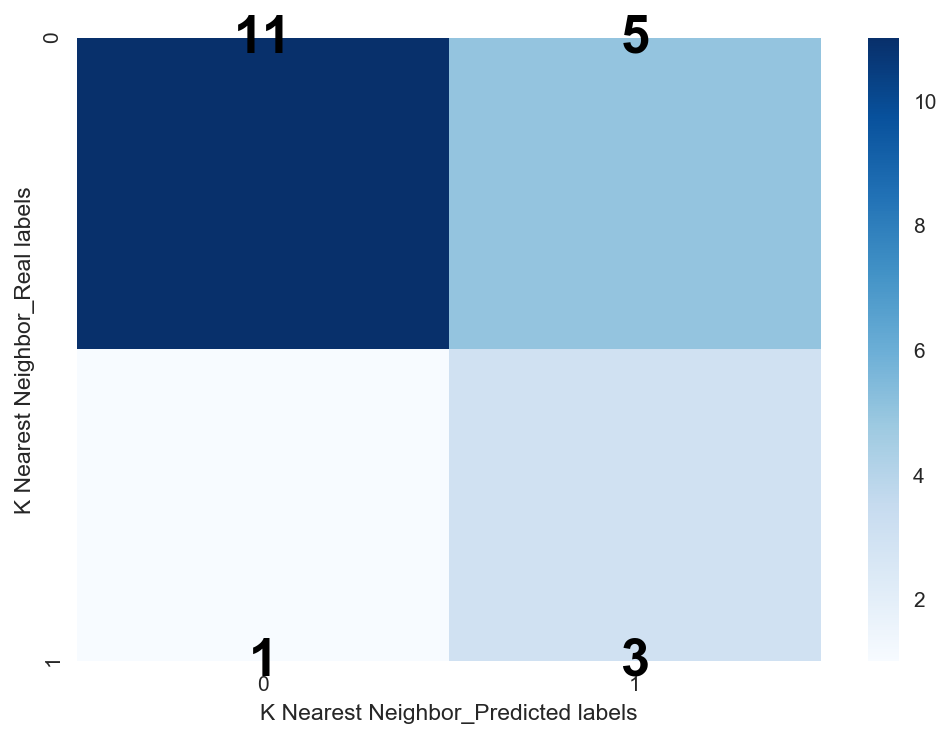

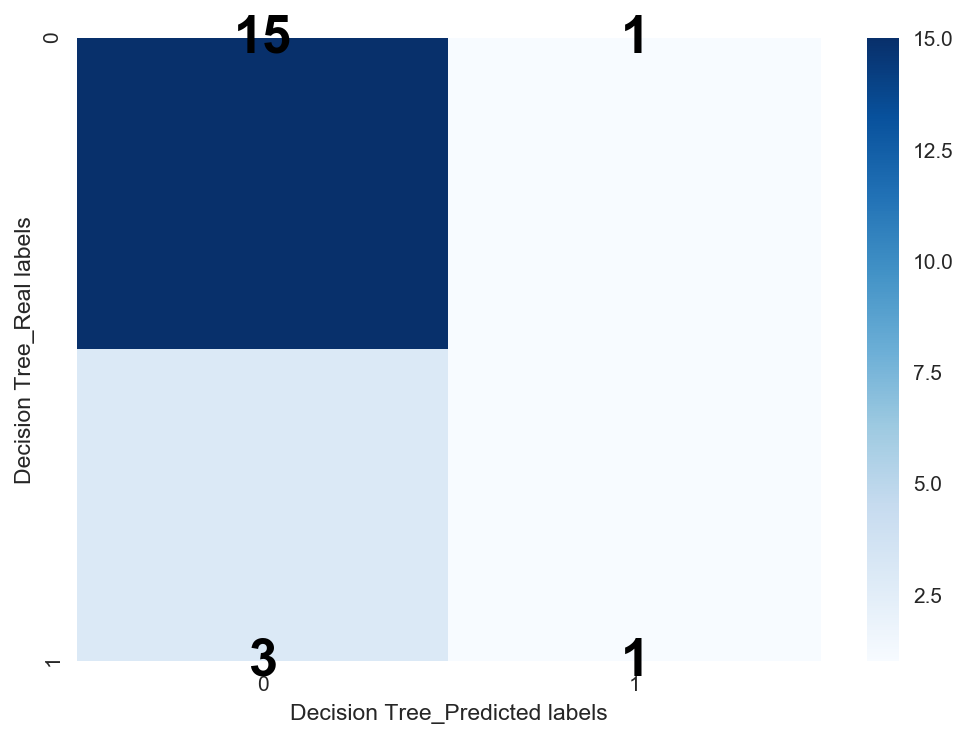

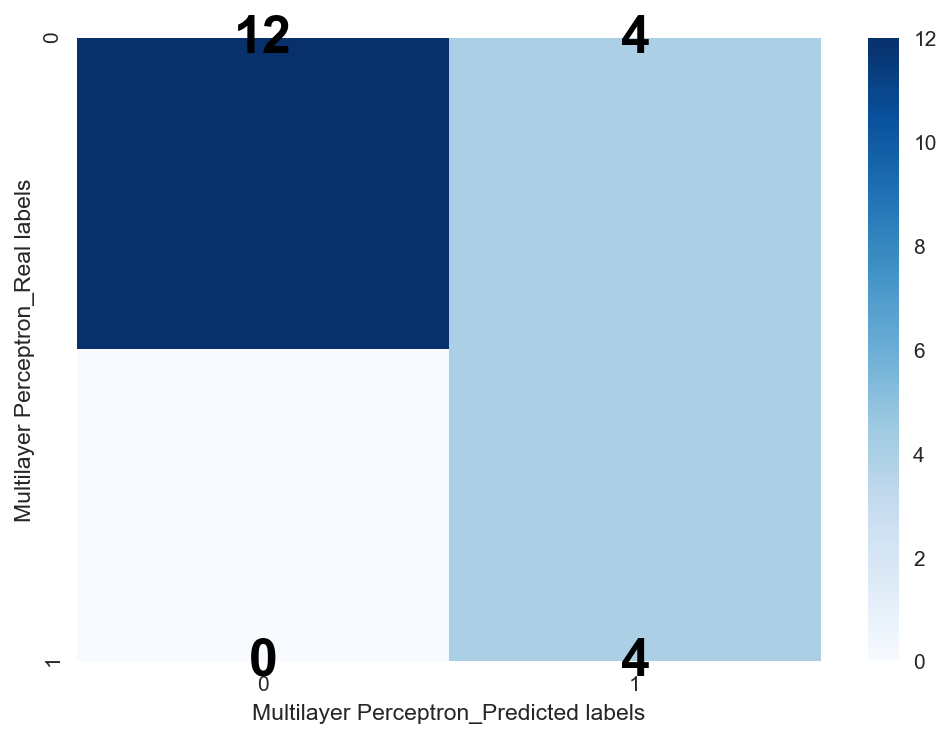

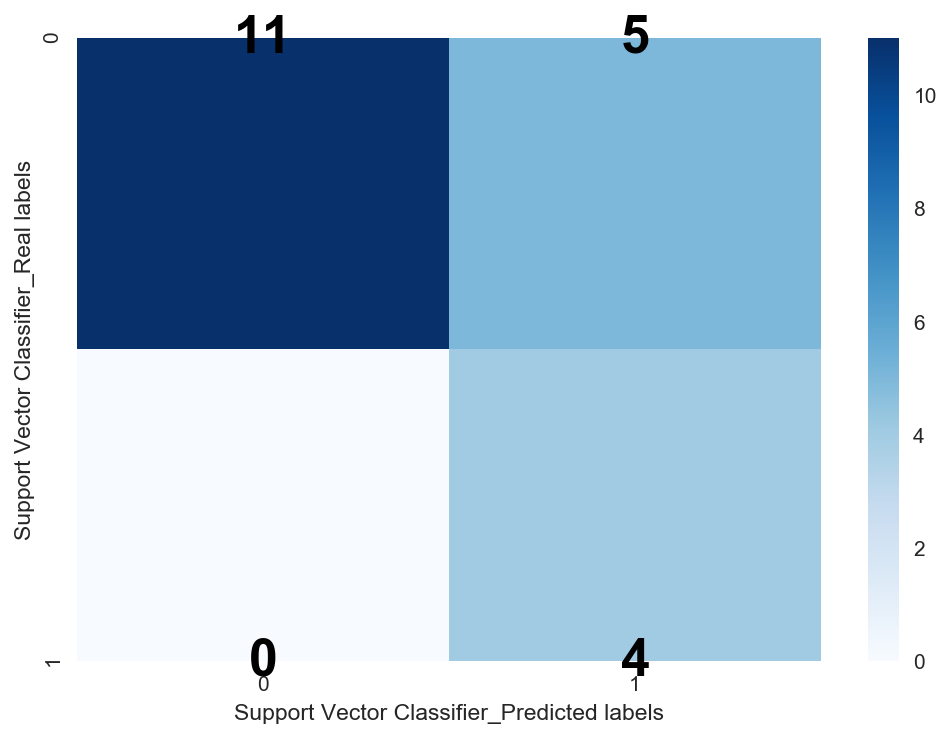

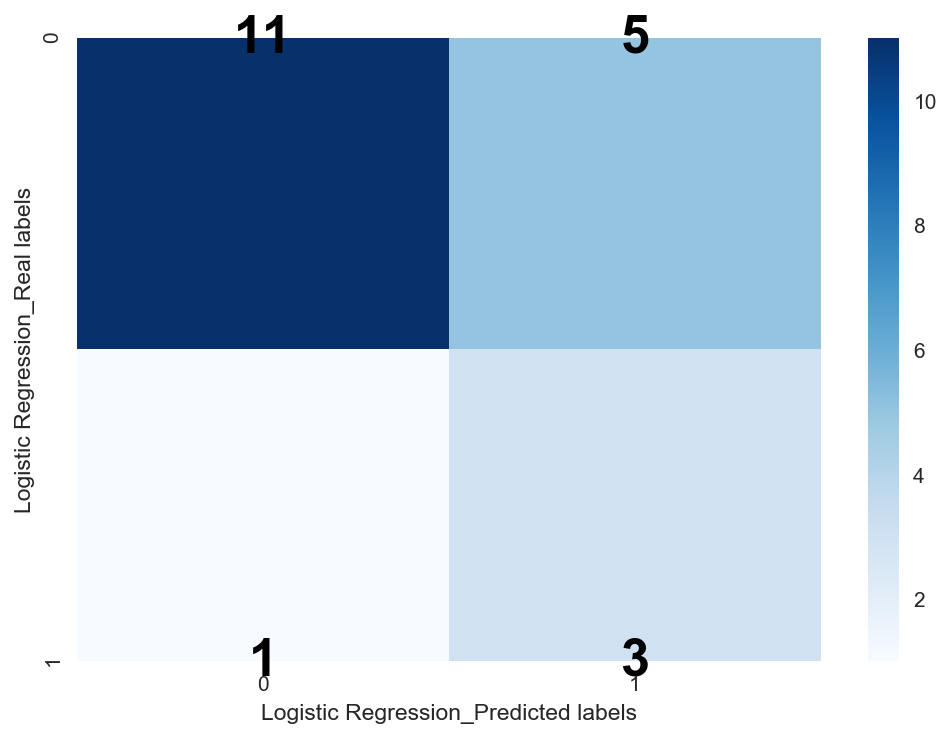

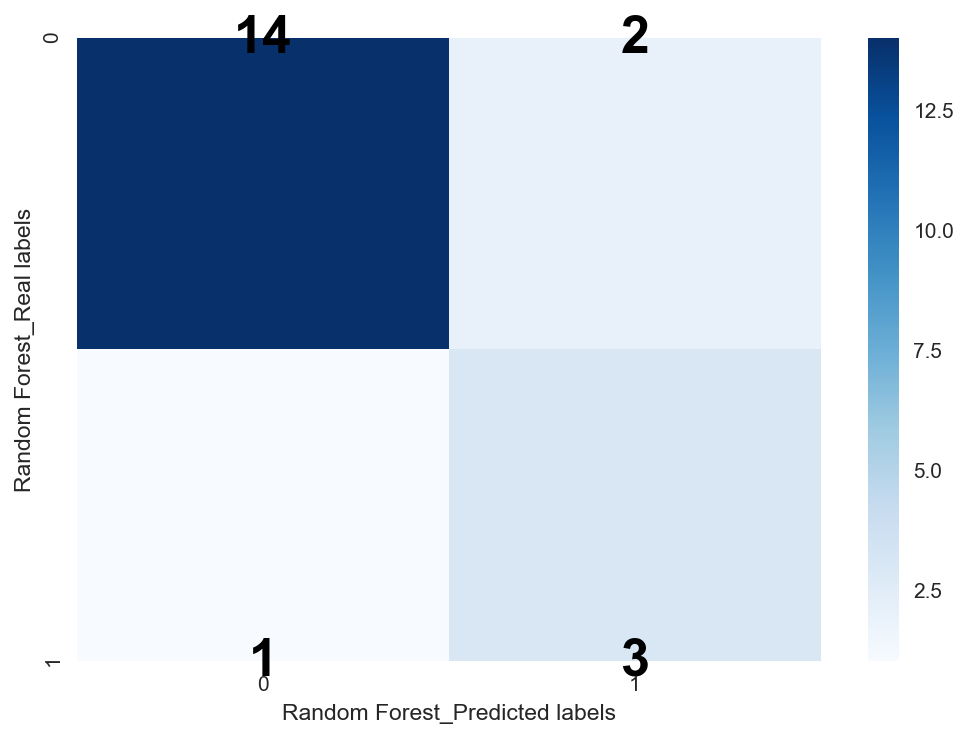

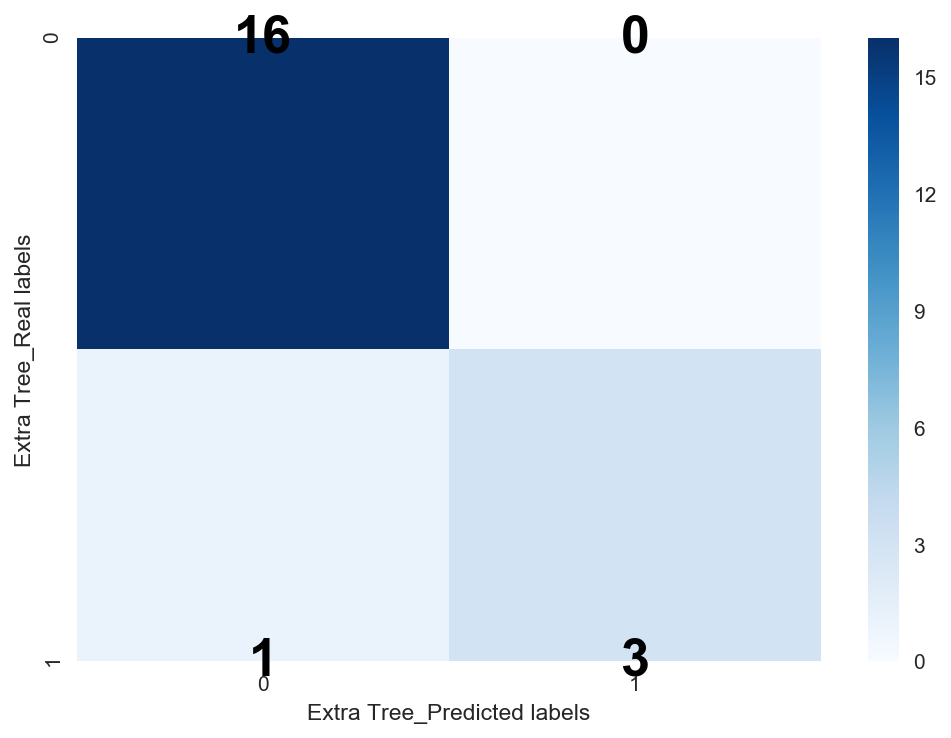

In [22]:
confusion_dict = {
    'kNN': np.array([[11, 5],[1, 3]]),
    'DT':  np.array([[15, 1],[3, 1]]),
    'MLP': np.array([[12, 4],[0, 4]]),
    'SVC': np.array([[11, 5], [0, 4]]),
    'LR':  np.array([[11, 5],[1, 3]]),
    'RF':  np.array([[14, 2],[1, 3]]),
    'ET':  np.array([[16, 0],[1, 3]])
}
model_dict = {
    'kNN':'K Nearest Neighbor',
    'DT':'Decision Tree',
    'MLP':'Multilayer Perceptron',
    'SVC':'Support Vector Classifier',
    'LR':'Logistic Regression',
    'RF':'Random Forest',
    'ET':'Extra Tree'
}
plt.rcParams['savefig.dpi'] = 150  
plt.rcParams['figure.dpi'] = 150
def show_conf_mx():
    for clf in confusion_dict.keys():
        plt.figure()
        sns.heatmap(data=confusion_dict[clf],fmt='g', annot=True, cmap='Blues', annot_kws={'size':25, 'weight':'bold', 'color':'black'})
        plt.xlabel(model_dict[clf]+'_Predicted labels')
        plt.ylabel(model_dict[clf]+'_Real labels')
        plt.show()
show_conf_mx()